<a href="https://colab.research.google.com/github/sv650s/springboard/blob/master/aic-8_2_8_tree-based-algorithms-mini-project/Mini_Project_Tree-Based_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project: Tree-Based Algorithms

## The "German Credit" Dataset

### Dataset Details

This dataset has two classes (these would be considered labels in Machine Learning terms) to describe the worthiness of a personal loan: "Good" or "Bad". There are predictors related to attributes, such as: checking account status, duration, credit history, purpose of the loan, amount of the loan, savings accounts or bonds, employment duration, installment rate in percentage of disposable income, personal information, other debtors/guarantors, residence duration, property, age, other installment plans, housing, number of existing credits, job information, number of people being liable to provide maintenance for, telephone, and foreign worker status.

Many of these predictors are discrete and have been expanded into several 0/1 indicator variables (a.k.a. they have been one-hot-encoded).

This dataset has been kindly provided by Professor Dr. Hans Hofmann of the University of Hamburg, and can also be found on the UCI Machine Learning Repository.

## Decision Trees

 As we have learned in the previous lectures, Decision Trees as a family of algorithms (irrespective to the particular implementation) are powerful algorithms that can produce models with a predictive accuracy higher than that produced by linear models, such as Linear or Logistic Regression. Primarily, this is due to the fact the DT's can model nonlinear relationships, and also have a number of tuning paramters, that allow for the practicioner to achieve the best possible model. An added bonus is the ability to visualize the trained Decision Tree model, which allows for some insight into how the model has produced the predictions that it has. One caveat here, to keep in mind, is that sometimes, due to the size of the dataset (both in the sense of the number of records, as well as the number of features), the visualization might prove to be very large and complex, increasing the difficulty of interpretation.

To give you a very good example of how Decision Trees can be visualized and interpreted, we would strongly recommend that, before continuing on with solving the problems in this Mini Project, you take the time to read this fanstastic, detailed and informative blog post: http://explained.ai/decision-tree-viz/index.html

## Building Your First Decision Tree Model

So, now it's time to jump straight into the heart of the matter. Your first task, is to build a Decision Tree model, using the aforementioned "German Credit" dataset, which contains 1,000 records, and 62 columns (one of them presents the labels, and the other 61 present the potential features for the model.)

For this task, you will be using the scikit-learn library, which comes already pre-installed with the Anaconda Python distribution. In case you're not using that, you can easily install it using pip.

Before embarking on creating your first model, we would strongly encourage you to read the short tutorial for Decision Trees in scikit-learn (http://scikit-learn.org/stable/modules/tree.html), and then dive a bit deeper into the documentation of the algorithm itself (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

Also, since you want to be able to present the results of your model, we suggest you take a look at the tutorial for accuracy metrics for classification models (http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) as well as the more detailed documentation (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Finally, an *amazing* resource that explains the various classification model accuracy metrics, as well as the relationships between them, can be found on Wikipedia: https://en.wikipedia.org/wiki/Confusion_matrix

(Note: as you've already learned in the Logistic Regression mini project, a standard practice in Machine Learning for achieving the best possible result when training a model is to use hyperparameter tuning, through Grid Search and k-fold Cross Validation. We strongly encourage you to use it here as well, not just because it's standard practice, but also becuase it's not going to be computationally to intensive, due to the size of the dataset that you're working with. Our suggestion here is that you split the data into 70% training, and 30% testing. Then, do the hyperparameter tuning and Cross Validation on the training set, and afterwards to a final test on the testing set.)

### Now we pass the torch onto you! You can start building your first Decision Tree model! :)

In [0]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [168]:
# Your code here! :)
df = pd.read_csv('GermanCredit.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
Duration                                  1000 non-null int64
Amount                                    1000 non-null int64
InstallmentRatePercentage                 1000 non-null int64
ResidenceDuration                         1000 non-null int64
Age                                       1000 non-null int64
NumberExistingCredits                     1000 non-null int64
NumberPeopleMaintenance                   1000 non-null int64
Telephone                                 1000 non-null int64
ForeignWorker                             1000 non-null int64
Class                                     1000 non-null object
CheckingAccountStatus.lt.0                1000 non-null int64
CheckingAccountStatus.0.to.200            1000 non-null int64
CheckingAccountStatus.gt.200              1000 non-null int64
CheckingAccountStatus.none                1000 non-null int64
CreditHistory.NoCredit.Al

# Let explore the data a little bit before we jump into impelementation

Looks like there is 1000 samples in the file

*   Class  is the column we want to use for classification
  * This is in string format so we will have to convert this to 0/1
*   Data is skewed  towards  Good with 700 samples with this classification and only 300 for Bad




In [169]:
df.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,CheckingAccountStatus.lt.0,CheckingAccountStatus.0.to.200,CheckingAccountStatus.gt.200,CheckingAccountStatus.none,CreditHistory.NoCredit.AllPaid,CreditHistory.ThisBank.AllPaid,CreditHistory.PaidDuly,CreditHistory.Delay,CreditHistory.Critical,Purpose.NewCar,Purpose.UsedCar,Purpose.Furniture.Equipment,Purpose.Radio.Television,Purpose.DomesticAppliance,Purpose.Repairs,Purpose.Education,Purpose.Vacation,Purpose.Retraining,Purpose.Business,Purpose.Other,SavingsAccountBonds.lt.100,SavingsAccountBonds.100.to.500,SavingsAccountBonds.500.to.1000,SavingsAccountBonds.gt.1000,SavingsAccountBonds.Unknown,EmploymentDuration.lt.1,EmploymentDuration.1.to.4,EmploymentDuration.4.to.7,EmploymentDuration.gt.7,EmploymentDuration.Unemployed,Personal.Male.Divorced.Seperated,Personal.Female.NotSingle,Personal.Male.Single,Personal.Male.Married.Widowed,Personal.Female.Single,OtherDebtorsGuarantors.None,OtherDebtorsGuarantors.CoApplicant,OtherDebtorsGuarantors.Guarantor,Property.RealEstate,Property.Insurance,Property.CarOther,Property.Unknown,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,Good,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,Bad,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,Good,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,Good,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,Bad,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0


In [170]:
df.loc[0:5, 'Class']

0    Good
1     Bad
2    Good
3    Good
4     Bad
5    Good
Name: Class, dtype: object

In [0]:
# class is what we are trying to predict - we are going  to map it to 0/1
# 0 - Bad
# 1- Good
y = df['Class'].map({'Bad': 0, 'Good': 1})

# drop this from our features
x = df.drop(['Class'], axis='columns')

In [172]:
y.groupby(y).size()

Class
0    300
1    700
Name: Class, dtype: int64

In [173]:
# split into train and test set
# stratify since we have imbalanced classes - this will shuffly by default
# 70% train / 30% test
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.3,
                                                    random_state=1, 
                                                    stratify=y)
print(len(X_train))
print(len(X_test))

700
300


## Let's train the model with default values

In [0]:
def evaluate_model(y_true, y_predict):
  """
  Print classification report and confusion matrix of results
  """
  print("Classification Report:")
  print(classification_report(y_true, y_predict, labels=[0,1],
                                  target_names=['Bad', 'Good']
                                  ))
  print("\nConfusion Matrix:")
  cm = confusion_matrix(y_test, predict)
  print(cm)
  
  return classification_report(y_true, y_predict, labels=[0,1],
                                  target_names=['Bad', 'Good'],
                                  output_dict=True), cm
  
  
  
def add_dict_to_dict(target :dict, source :dict) -> dict:
  """
  target: dictionary to add to
  source: dictionary to add from
  ------
  return: dictionary with source added to target
  """
  if isinstance(source, dict):
      for key, value in source.items():
          if isinstance(value, dict):
              # append key to dictionary keys
              for subkey, subvalue in value.items():
                  target[f'{key}_{subkey}'] = subvalue
          else:
              target[key] = value
  else:
      raise Exception("source is not a dictionary")

  return target

def add_to_report(report: pd.DataFrame, 
                  classifier_name: str,
                  classification_report: dict, 
                 confusion_matrix: list):
  """
  Adds confusion matrix and classification report to report dataframe so we
  can display this at the end of the notebook
  """
  report_dict = add_dict_to_dict({}, classification_report)
  report_dict["confusion_matrix"] = confusion_matrix
  report_dict["name"] = classifier_name
  report = report.append(report_dict, ignore_index=True)
  
  return report

In [0]:
clf = DecisionTreeClassifier(random_state=1)
clf = clf.fit(X_train, y_train)
predict = clf.predict(X_test)



## Let's look at how we did with  default model

Precision:
Model is better at accurately classifying Good than Bad
* 43%  of the time when model predicts Bad, it is Good
* 74% of the time when model predict Good, it is Good

Recall

Model again is better at identifying Good vs Bad

* 80% of all Goods were classified as Good
* only 36% of all Bads were classified as Bad

In [176]:
evaluate_model(y_test, predict)

Classification Report:
              precision    recall  f1-score   support

         Bad       0.43      0.36      0.39        90
        Good       0.74      0.80      0.77       210

    accuracy                           0.67       300
   macro avg       0.59      0.58      0.58       300
weighted avg       0.65      0.67      0.66       300


Confusion Matrix:
[[ 32  58]
 [ 42 168]]


({'Bad': {'f1-score': 0.3902439024390244,
   'precision': 0.43243243243243246,
   'recall': 0.35555555555555557,
   'support': 90},
  'Good': {'f1-score': 0.7706422018348624,
   'precision': 0.7433628318584071,
   'recall': 0.8,
   'support': 210},
  'accuracy': 0.6666666666666666,
  'macro avg': {'f1-score': 0.5804430521369435,
   'precision': 0.5878976321454198,
   'recall': 0.5777777777777778,
   'support': 300},
  'weighted avg': {'f1-score': 0.656522712016111,
   'precision': 0.6500837120306148,
   'recall': 0.6666666666666666,
   'support': 300}},
 array([[ 32,  58],
        [ 42, 168]]))

## Let's see if we can improve the model by tuning it

Documentation recommends the following:
* max_depth = 5
* min_sample_leaf = 5
* class_weight = 'balanced'


This provided a slight improvement for the non-dominant class.

Precision for Bad stayed the same at 43%
Recall for Bad increased from 36% to 59% - meaning that we are getting much better at identifying Bad samples


Precision also increased for our dominant class - Good from 74% to 79%.
However, overall we are getting worse at identifying Good samples as recall decreased from 79% to 67%

In [0]:
clf = DecisionTreeClassifier(max_depth=3, 
                             min_samples_leaf=5, 
                             class_weight='balanced',
                            random_state=1)
clf = clf.fit(X_train, y_train)
predict = clf.predict(X_test)


In [178]:
evaluate_model(y_test, predict)

Classification Report:
              precision    recall  f1-score   support

         Bad       0.43      0.59      0.50        90
        Good       0.79      0.67      0.73       210

    accuracy                           0.65       300
   macro avg       0.61      0.63      0.61       300
weighted avg       0.68      0.65      0.66       300


Confusion Matrix:
[[ 53  37]
 [ 69 141]]


({'Bad': {'f1-score': 0.5,
   'precision': 0.4344262295081967,
   'recall': 0.5888888888888889,
   'support': 90},
  'Good': {'f1-score': 0.7268041237113402,
   'precision': 0.7921348314606742,
   'recall': 0.6714285714285714,
   'support': 210},
  'accuracy': 0.6466666666666666,
  'macro avg': {'f1-score': 0.6134020618556701,
   'precision': 0.6132805304844354,
   'recall': 0.6301587301587301,
   'support': 300},
  'weighted avg': {'f1-score': 0.6587628865979381,
   'precision': 0.684822250874931,
   'recall': 0.6466666666666666,
   'support': 300}},
 array([[ 53,  37],
        [ 69, 141]]))

## Use GridSearchCV to see if we can find a better model

Parameters we will tune here are:
* max_depth - we will try 3, 6, 12
* min_sample_leaf - 5, 10, 20
* min_weight_fraction_left - 0., 0.2, 0.4
* max_features - 2, 4, 8

We will use 5-fold for cross validation

In [179]:
grid = {"max_depth": [None, 3, 6, 12],
       "min_samples_leaf": [1, 5, 10, 20],
       "min_weight_fraction_leaf": [0., 0.2, 0.4],
       "max_features": [None, 2, 4, 8]}
clf = DecisionTreeClassifier(random_state=1)
gs = GridSearchCV(clf, 
                  cv=5, 
                  param_grid=grid, 
                  scoring='roc_auc',
                  return_train_score=True, 
                  verbose=1)
gs_fit = gs.fit(X_train, y_train)
predict = gs.predict(X_test)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 960 out of 960 | elapsed:    6.9s finished


In [180]:
gs.best_params_

{'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.2}

In [181]:
gs.best_score_

0.7093537414965987

### Analysis for GridSearchCV

Slight improvement for precision for Bad samples - 45% to 50%
Although we are gettting worse at identifying these samples over all since recall dropped from 50% to 42%

We are getting less accurate for identifying Good sampels as well since our precision dropped from 79% to 77%
However, we are geting better that overall identifying Good samples as recall increased from 67% to 82%

In [182]:
dtc_cr, dtc_cm = evaluate_model(y_test, predict)

Classification Report:
              precision    recall  f1-score   support

         Bad       0.50      0.42      0.46        90
        Good       0.77      0.82      0.79       210

    accuracy                           0.70       300
   macro avg       0.63      0.62      0.63       300
weighted avg       0.69      0.70      0.69       300


Confusion Matrix:
[[ 38  52]
 [ 38 172]]


In [183]:
report = pd.DataFrame()

report = add_to_report(report, "DecisionTreeClassifier", dtc_cr, dtc_cm)
report

,Bad_f1-score,Bad_precision,Bad_recall,Bad_support,Good_f1-score,Good_precision,Good_recall,Good_support,accuracy,confusion_matrix,macro avg_f1-score,macro avg_precision,macro avg_recall,macro avg_support,name,weighted avg_f1-score,weighted avg_precision,weighted avg_recall,weighted avg_support
0,0.457831,0.5,0.422222,90.0,0.792627,0.767857,0.819048,210.0,0.7,"[[38, 52], [38, 172]]",0.625229,0.633929,0.620635,300.0,DecisionTreeClassifier,0.692188,0.6875,0.7,300.0


### After you've built the best model you can, now it's time to visualize it!

Rememeber that amazing blog post from a few paragraphs ago, that demonstrated how to visualize and interpret the results of your Decision Tree model. We've seen that this can perform very well, but let's see how it does on the "German Credit" dataset that we're working on, due to it being a bit larger than the one used by the blog authors.

First, we're going to need to install their package. If you're using Anaconda, this can be done easily by running:

In [184]:
! pip install dtreeviz

If for any reason this way of installing doesn't work for you straight out of the box, please refer to the more detailed documentation here: https://github.com/parrt/dtreeviz

Now you're ready to visualize your Decision Tree model! Please feel free to use the blog post for guidance and inspiration!

# I'm not sure what to do next. I've tried installed this package on my macbook pro but I can't get it to work. I've tried pinging the writer of this package and followed all the instrauctions but it doesn't seem to work. When I run this on google Colab, it does not show any graph just a blank screen

In [0]:
from dtreeviz.trees import *

viz = dtreeviz(gs.best_estimator_, 
               X_train, 
               y_train,
               target_name='Class',
              feature_names=X_train.columns, 
               class_names=["Bad", "Good"]  # need class_names for classifier
              )  
viz.view()

### Since I can't get dtreeviz to work. I'm going to use the default tree viewer from sklearn

[Text(200.88000000000002, 181.2, 'X[12] <= 0.5\nentropy = 0.42\nsamples = 700\nvalue = [210, 490]'),
 Text(133.92000000000002, 108.72, 'X[0] <= 22.5\nentropy = 0.485\nsamples = 431\nvalue = [178, 253]'),
 Text(66.96000000000001, 36.23999999999998, 'entropy = 0.429\nsamples = 250\nvalue = [78, 172]'),
 Text(200.88000000000002, 36.23999999999998, 'entropy = 0.494\nsamples = 181\nvalue = [100, 81]'),
 Text(267.84000000000003, 108.72, 'entropy = 0.21\nsamples = 269\nvalue = [32, 237]')]

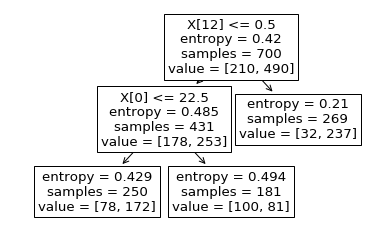

In [186]:
from sklearn import tree
tree.plot_tree(gs.best_estimator_.fit(X_train, y_train)) 


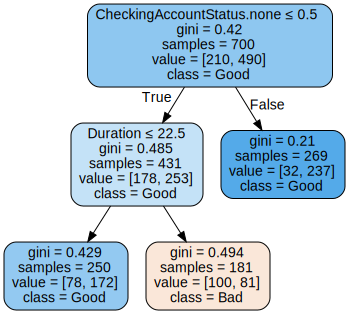

In [187]:
 dot_data = tree.export_graphviz(gs.best_estimator_, out_file=None, 
                      feature_names=X_train.columns,  
                      class_names=['Bad', 'Good'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

## Random Forests

As discussed in the lecture videos, Decision Tree algorithms also have certain undesireable properties. Mainly the have low bias, which is good, but tend to have high variance - which is *not* so good (more about this problem here: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff).

Noticing these problems, the late Professor Leo Breiman, in 2001, developed the Random Forests algorithm, which mitigates these problems, while at the same time providing even higher predictive accuracy than the majority of Decision Tree algorithm implementations. While the curriculum contains two excellent lectures on Random Forests, if you're interested, you can dive into the original paper here: https://link.springer.com/content/pdf/10.1023%2FA%3A1010933404324.pdf.

In the next part of this assignment, your are going to use the same "German Credit" dataset to train, tune, and measure the performance of a Random Forests model. You will also see certain functionalities that this model, even though it's a bit of a "black box", provides for some degree of interpretability.

First, let's build a Random Forests model, using the same best practices that you've used for your Decision Trees model. You can reuse the things you've already imported there, so no need to do any re-imports, new train/test splits, or loading up the data again.

In [0]:
from sklearn.ensemble import RandomForestClassifier

## Run Random Forest with default values

In [0]:
# Your code here! :)
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)
predict = rf.predict(X_test)

In [190]:
evaluate_model(y_test, predict)

Classification Report:
              precision    recall  f1-score   support

         Bad       0.62      0.53      0.57        90
        Good       0.81      0.86      0.84       210

    accuracy                           0.76       300
   macro avg       0.72      0.70      0.71       300
weighted avg       0.76      0.76      0.76       300


Confusion Matrix:
[[ 48  42]
 [ 29 181]]


({'Bad': {'f1-score': 0.5748502994011976,
   'precision': 0.6233766233766234,
   'recall': 0.5333333333333333,
   'support': 90},
  'Good': {'f1-score': 0.8360277136258661,
   'precision': 0.8116591928251121,
   'recall': 0.861904761904762,
   'support': 210},
  'accuracy': 0.7633333333333333,
  'macro avg': {'f1-score': 0.7054390065135319,
   'precision': 0.7175179081008678,
   'recall': 0.6976190476190476,
   'support': 300},
  'weighted avg': {'f1-score': 0.7576744893584656,
   'precision': 0.7551744219905655,
   'recall': 0.7633333333333333,
   'support': 300}},
 array([[ 48,  42],
        [ 29, 181]]))

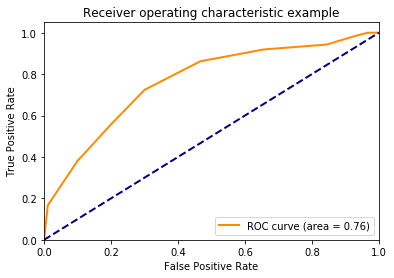

In [191]:
from sklearn.metrics import roc_curve, roc_auc_score

y_score = rf.fit(X_train, y_train).predict_proba(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])
roc_auc = roc_auc_score(y_test, y_score[:, 1])

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()



### Use GridSearchCV to see if we can optimize

In [192]:
grid_rf = {"n_estimators": [10, 100, 200], "max_features": [None, 'auto', 'log2'], 'max_depth': [None, 5, 10, 20],
          "class_weight": [None, 'balanced', 'balanced_subsample']}
rf = RandomForestClassifier(random_state=1)
gs = GridSearchCV(rf, cv=5, 
                  param_grid=grid_rf, 
                  scoring='roc_auc',
                  return_train_score=True, 
                  verbose=1)
gs_fit = gs.fit(X_train, y_train)
predict = gs.predict(X_test)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:  2.0min finished


In [193]:
print(f'Best Params: {gs.best_params_}')
print(f'Best Score: {gs.best_score_}')
rf_cr, rf_cm = evaluate_model(y_test, predict)

Best Params: {'class_weight': 'balanced', 'max_depth': 20, 'max_features': 'log2', 'n_estimators': 100}
Best Score: 0.7740767735665693
Classification Report:
              precision    recall  f1-score   support

         Bad       0.69      0.30      0.42        90
        Good       0.76      0.94      0.84       210

    accuracy                           0.75       300
   macro avg       0.73      0.62      0.63       300
weighted avg       0.74      0.75      0.71       300


Confusion Matrix:
[[ 27  63]
 [ 12 198]]


In [194]:
gs.scorer_

make_scorer(roc_auc_score, needs_threshold=True)

In [195]:
# add results to report

report = add_to_report(report, "RandomForestClassifier", rf_cr, rf_cm)
report

,Bad_f1-score,Bad_precision,Bad_recall,Bad_support,Good_f1-score,Good_precision,Good_recall,Good_support,accuracy,confusion_matrix,macro avg_f1-score,macro avg_precision,macro avg_recall,macro avg_support,name,weighted avg_f1-score,weighted avg_precision,weighted avg_recall,weighted avg_support
0,0.457831,0.500000,0.422222,90.0,0.792627,0.767857,0.819048,210.0,0.70,"[[38, 52], [38, 172]]",0.625229,0.633929,0.620635,300.0,DecisionTreeClassifier,0.692188,0.687500,0.70,300.0
1,0.418605,0.692308,0.300000,90.0,0.840764,0.758621,0.942857,210.0,0.75,"[[27, 63], [12, 198]]",0.629684,0.725464,0.621429,300.0,RandomForestClassifier,0.714116,0.738727,0.75,300.0


### RandomForest GridSearchCV Analysis

Hmmm.. looks like our gridsearch actually came up with a worse model than before even though the ooverall macro scores are around the same as before

The new model is really bad at identifying Bad samples. Although when it does, it's more accurate than before - 69% precision.

However, recall for Bad samples is now down to 30% which means it's only able to identify 30% of overall Bad samples

Good samples droped in precision to 76% but we are able to identify more Good samples than before as recall increased to 94%

[0 1]


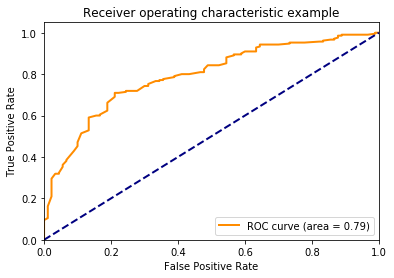

In [196]:
from sklearn.metrics import roc_curve, roc_auc_score

y_score = gs.best_estimator_.predict_proba(X_test)

print(gs.classes_)

# Compute ROC curve and ROC area for each class
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(2):
#     fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])
roc_auc = roc_auc_score(y_test, y_score[:, 1])

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()



As mentioned, there are certain ways to "peek" into a model created by the Random Forests algorithm. The first, and most popular one, is the Feature Importance calculation functionality. This allows the ML practitioner to see an ordering of the importance of the features that have contributed the most to the predictive accuracy of the model. 

You can see how to use this in the scikit-learn documentation (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_). Now, if you tried this, you would just get an ordered table of not directly interpretable numeric values. Thus, it's much more useful to show the feature importance in a visual way. You can see an example of how that's done here: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

Now you try! Let's visualize the importance of features from your Random Forests model!

Feature ranking:


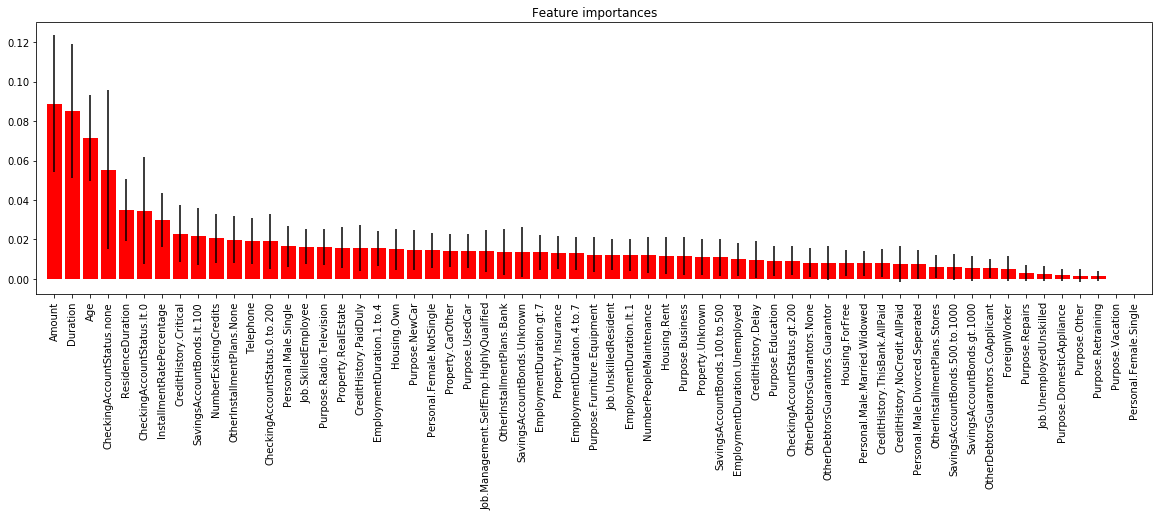

In [197]:
# Your code here
be = gs.best_estimator_
importances = be.feature_importances_

std = np.std([tree.feature_importances_ for tree in be.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")


# Plot the feature importances of the forest
f, a = plt.subplots(1, 1, figsize=(20, 5))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
# plt.xticks(range(X_train.shape[1]), indices)
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

A final method for gaining some insight into the inner working of your Random Forests models is a so-called Partial Dependence Plot. The Partial Dependence Plot (PDP or PD plot) shows the marginal effect of a feature on the predicted outcome of a previously fit model. The prediction function is fixed at a few values of the chosen features and averaged over the other features. A partial dependence plot can show if the relationship between the target and a feature is linear, monotonic or more complex. 

In scikit-learn, PDPs are implemented and available for certain algorithms, but at this point (version 0.20.0) they are not yet implemented for Random Forests. Thankfully, there is an add-on package called **PDPbox** (https://pdpbox.readthedocs.io/en/latest/) which adds this functionality to Random Forests. The package is easy to install through pip.

In [198]:
! pip install pdpbox

While we encourage you to read the documentation for the package (and reading package documentation in general is a good habit to develop), the authors of the package have also written an excellent blog post on how to use it, showing examples on different algorithms from scikit-learn (the Random Forests example is towards the end of the blog post): https://briangriner.github.io/Partial_Dependence_Plots_presentation-BrianGriner-PrincetonPublicLibrary-4.14.18-updated-4.22.18.html

So, armed with this new knowledge, feel free to pick a few features, and make a couple of Partial Dependence Plots of your own!

(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7ff421e145c0>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7ff421e9ae48>})

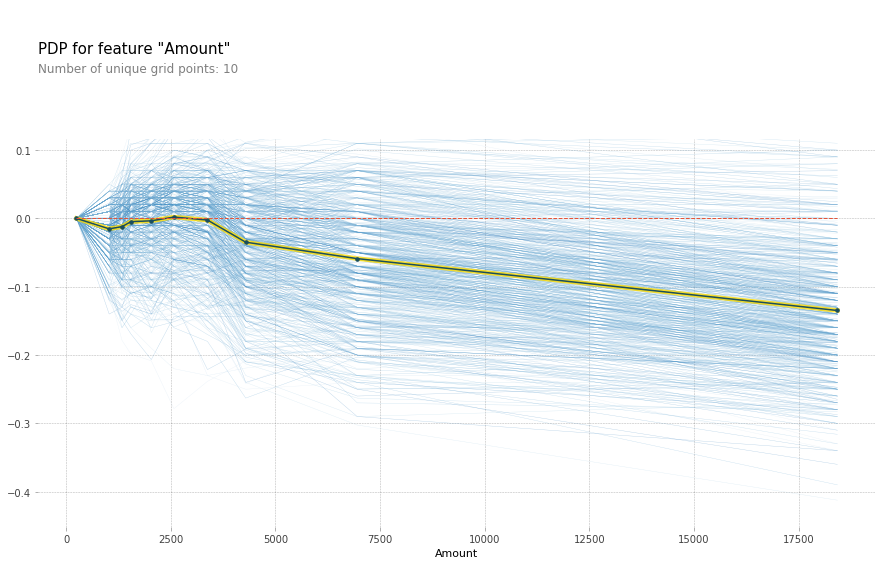

In [199]:
from pdpbox import pdp

isolate = pdp.pdp_isolate(be, X_train, X_train.columns, "Amount")
pdp.pdp_plot(isolate, "Amount", center=True, plot_lines=True)

(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7ff421935358>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7ff421e29470>})

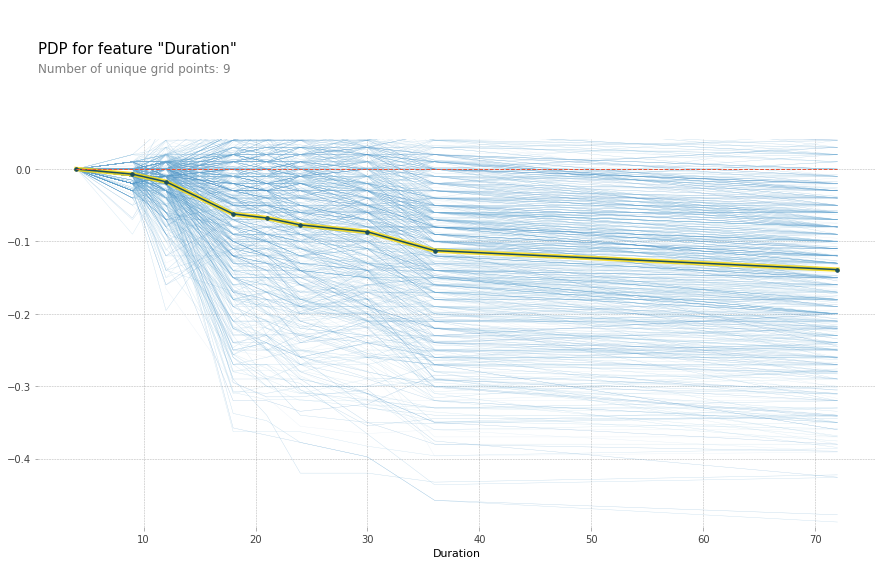

In [200]:
isolate = pdp.pdp_isolate(be, X_train, X_train.columns, "Duration")
pdp.pdp_plot(isolate, "Duration", center=True, plot_lines=True)

(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7ff4211885c0>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7ff421e14080>})

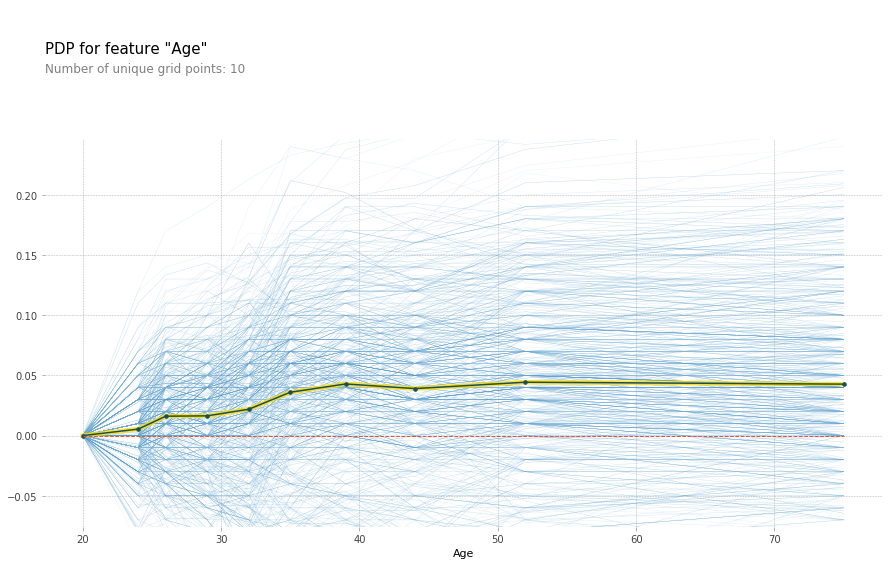

In [201]:
isolate = pdp.pdp_isolate(be, X_train, X_train.columns, "Age")
pdp.pdp_plot(isolate, "Age", center=True, plot_lines=True)

(<Figure size 756x900 with 5 Axes>,
 {'pdp_inter_ax': {'_pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7ff420a49e80>,
   '_pdp_x_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7ff420a6b3c8>,
   '_pdp_y_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7ff4209aa4a8>},
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7ff4269b85f8>})

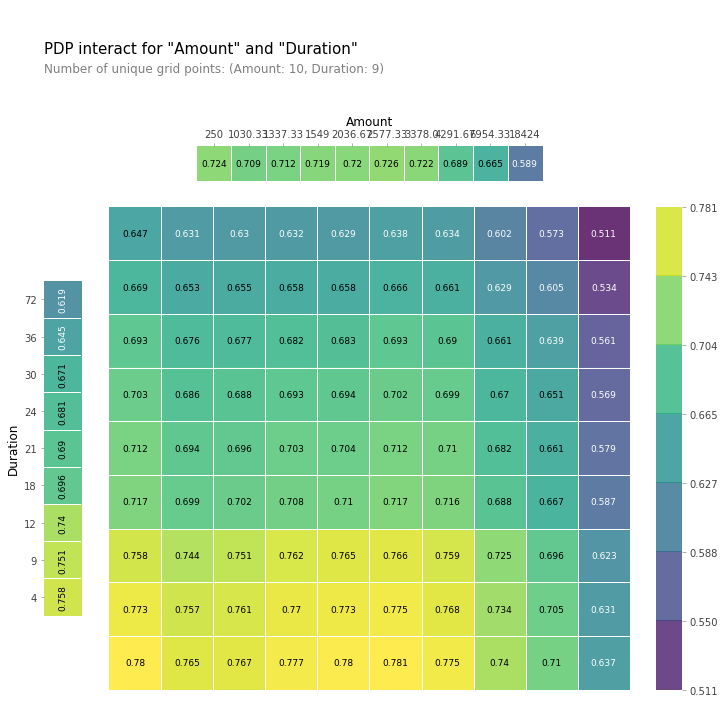

In [202]:
# Your code here!
pdp_amount_duration = pdp.pdp_interact(be, X_train, X_train.columns, ['Amount','Duration'])
pdp.pdp_interact_plot(pdp_amount_duration, ['Amount','Duration'], plot_type='grid', plot_pdp=True)


## (Optional) Advanced Boosting-Based Algorithms

As explained in the video lectures, the next generation of algorithms after Random Forests (that use Bagging, a.k.a. Bootstrap Aggregation) were developed using Boosting, and the first one of these were Gradient Boosted Machines, which are implemented in scikit-learn (http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting).

Still, in recent years, a number of variations on GBMs have been developed by different research amd industry groups, all of them bringing improvements, both in speed, accuracy and functionality to the original Gradient Boosting algorithms.

In no order of preference, these are:
1. **XGBoost**: https://xgboost.readthedocs.io/en/latest/
2. **CatBoost**: https://tech.yandex.com/catboost/
3. **LightGBM**: https://lightgbm.readthedocs.io/en/latest/

If you're using the Anaconda distribution, these are all very easy to install:

In [203]:
! conda install -c anaconda py-xgboost

/bin/bash: conda: command not found


In [204]:
! conda install -c conda-forge catboost

/bin/bash: conda: command not found


In [205]:
! conda install -c conda-forge lightgbm

/bin/bash: conda: command not found


Your task in this optional section of the mini project is to read the documentation of these three libraries, and apply all of them to the "German Credit" dataset, just like you did in the case of Decision Trees and Random Forests.

The final deliverable of this section should be a table (can be a pandas DataFrame) which shows the accuracy of all the five algorthms taught in this mini project in one place.

Happy modeling! :)

# Final Analysis

I decided not to implement the optional classifiers since I've already done them in my Capstone project.

I don't know if there is a clear winner between RandomForestClassifier and DecisionTreeClassifier

Random Forest seems to do better at identifying the Good loans. Precision was about the same as Decision Tree but recall is significatly higher meaning that out of all loans that should be considered Good, it is able to find around 95% of them. 

AUC is slightly higher for Random Forest meaning it is able to separate the 2 classes slightly better than Decision Tree


Both did not do great on Bad loans. While decision tree was able to find identify more actual Bad loans, it's precision is also lower, meaning that it is more likely to identify a Good loan as bad. Out of all Bad loans, Random Forest identified less of these, however, it is more likely that Random Forest is accurate when it does identify these.

So personally, I would probably pick Random Forest as I value precision better over recall. If my model suggests that something is Bad or Good, I would want to be able to trust it.

In [206]:
report.set_index("name").T

name,DecisionTreeClassifier,RandomForestClassifier
Bad_f1-score,0.457831,0.418605
Bad_precision,0.5,0.692308
Bad_recall,0.422222,0.3
Bad_support,90,90
Good_f1-score,0.792627,0.840764
Good_precision,0.767857,0.758621
Good_recall,0.819048,0.942857
Good_support,210,210
accuracy,0.7,0.75
confusion_matrix,"[[38, 52], [38, 172]]","[[27, 63], [12, 198]]"
